In [ ]:
# GLO Jan 2 2022

# Need 
# 1/ function to read Ecospace out time series into pandas
# 2/ function to read Ecopsace out xyt maps into ....
#    - solution to map rotated EwE grid (merge w/ georeferenced netcdf?)
# 3/ function to read CSV of chl_a prepped by Dhavan
# 4/ visual to plot repeated time series line graphs from Ecospace
# 5/ visual to display Ecospace results

# use xarray - easier than netcdf library
#  e.g. https://github.com/bmooremaley/software-workouts/blob/master/tutorials/pub_quality_figures.ipynb
# https://github.com/SalishSeaCast/analysis-ben

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
from matplotlib import pyplot as plt, dates
import matplotlib.gridspec as grid_spec
from datetime import datetime, timedelta
from calendar import month_name

from tqdm.notebook import tqdm
#from salishsea_tools import nc_tools
#from dask.diagnostics import ProgressBar

%matplotlib inline

ModuleNotFoundError: No module named 'xarray'

In [207]:
# Read Ecospace out time series files

path_ecospaceout = "C://Users//Greig//Sync//PSF//EwE//Georgia Strait 2021//LTL_model//ECOSPACE_OUT//ECOSPACE_diagnostic_Z4P4D_2021_Dec24//ECOSPACE RUN 104//"
file_esout_B = "Ecospace_Average_Biomass.csv"

skipheaderlines = 28
ecospace_df = pd.read_csv(path_ecospaceout + file_esout_B, skiprows=skipheaderlines, index_col=0)

init_yr = 1979
init_mo = 1

# create date field
ecospace_df["year"] = (ecospace_df.index - 1) // 12 + 1979
ecospace_df["month0"] = ecospace_df.index % 12
ecospace_df["month"] = ecospace_df['month0'].apply(lambda x: 12if x == 0 else x)
ecospace_df["day"] = 15 # assume Ecospace results are middle of month
ecospace_df["date1"] = pd.to_datetime(ecospace_df[["year", "month", "day"]])


repeated time series

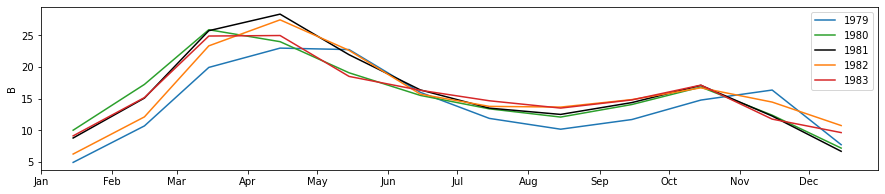

In [208]:

year_start = 1979
year_end = 1984
#ewe_group = "P1_micro_dinoflag 20-200 um"
ewe_group = "P2_micro_diat 20-200 um"

# Build figure layout
fig, ax = plt.subplots(figsize=(15, 3))

# Plotting properties
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

# Plot Ecospace out
for year, color in zip(range(year_start, year_end), palette):
    index = np.logical_and(ecospace_df["date1"] >= datetime(year, 1, 1), ecospace_df["date1"] < datetime(year, 12, 31))
    x = [datetime(2007, t.month, t.day) for t in ecospace_df['date1'][index]]
    ax.plot(x, ecospace_df[ewe_group][index], color=color, label=year)
ax.set_xlim([datetime(2007, 1, 1), datetime(2007, 12, 31)])
#ax.set_ylim([0, 12])
ax.set_ylabel('B')
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))
ax.legend()



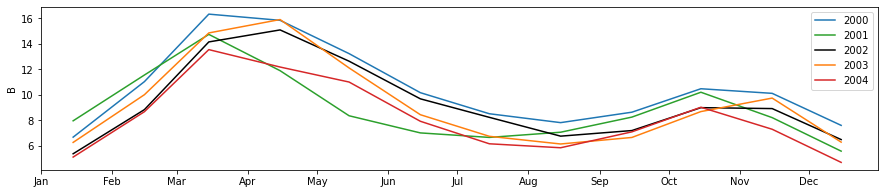

In [195]:
year_start = 2000
year_end = 2005
#ewe_group = "P1_micro_dinoflag 20-200 um"
ewe_group = "P2_micro_diat 20-200 um"

# Build figure layout
fig, ax = plt.subplots(figsize=(15, 3))

# Plotting properties
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

# Plot Ecospace out
for year, color in zip(range(year_start, year_end), palette):
    index = np.logical_and(ecospace_df["date1"] >= datetime(year, 1, 1), ecospace_df["date1"] < datetime(year, 12, 31))
    x = [datetime(2007, t.month, t.day) for t in ecospace_df['date1'][index]]
    ax.plot(x, ecospace_df[ewe_group][index], color=color, label=year)
ax.set_xlim([datetime(2007, 1, 1), datetime(2007, 12, 31)])
#ax.set_ylim([0, 12])
ax.set_ylabel('B')
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))
ax.legend()

In [4]:
ecospace_df

Z1_2-20cm_macro  Z2_0.2-20mm_meso  Z3_20-200um_micro  \
TimeStep                                                         
1               16.448710         13.423280           6.415177   
2               14.913890          9.991998           3.495420   
3               12.509740          7.395208           2.666968   
4               10.195710          6.137495           3.691139   
5                8.568314          5.872474           8.013625   
...                   ...               ...                ...   
476              5.265659         16.513340           5.139066   
477              5.275671         16.559870           5.134866   
478              5.285673         16.593380           5.130945   
479              5.295601         16.613730           5.127867   
480              5.305352         16.621190           5.125931   

          Z4_5-20um_nano  P1_micro_dinoflag 20-200 um  \
TimeStep                                                
1               1.650436                     0.490232   
2               0.775757                     0.349264   
3               0.702110                     0.540797   
4               1.389748                     1.614740   
5               4.673330                     7.085291   
...                  ...                          ...   
476             1.279953                     0.989925   
477             1.281361                     0.989707   
478             1.282818                     0.989599   
479             1.284352                     0.989647   
480             1.285964                     0.989843   

          P2_micro_diat 20-200 um  P3_nano_2-20um  P4_pico_lt_2um  \
TimeStep                                                            
1                        3.607435        2.238508        1.418542   
2                        6.365205        4.181902        2.736213   
3                       11.120480       12.851050        7.333649   
4                       13.662050       30.302700       12.984290   
5                       15.632330       34.524570       13.349530   
...                           ...             ...             ...   
476                      8.464473        6.327321        3.163840   
477                      8.461857        6.332231        3.163115   
478                      8.459832        6.339713        3.162615   
479                      8.458287        6.348642        3.162216   
480                      8.457082        6.357417        3.161712   

              Detritus  year  month0  month  day      date1  
TimeStep                                                     
1         9.999666e-31  1979       1      1   15 1979-01-15  
2         9.999666e-31  1979       2      2   15 1979-02-15  
3         9.999666e-31  1979       3      3   15 1979-03-15  
4         9.999666e-31  1979       4      4   15 1979-04-15  
5         9.999666e-31  1979       5      5   15 1979-05-15  
...                ...   ...     ...    ...  ...        ...  
476       9.999666e-31  2018       8      8   15 2018-08-15  
477       9.999666e-31  2018       9      9   15 2018-09-15  
478       9.999666e-31  2018      10     10   15 2018-10-15  
479       9.999666e-31  2018      11     11   15 2018-11-15  
480       9.999666e-31  2018       0     12   15 2018-12-15  

[480 rows x 14 columns]

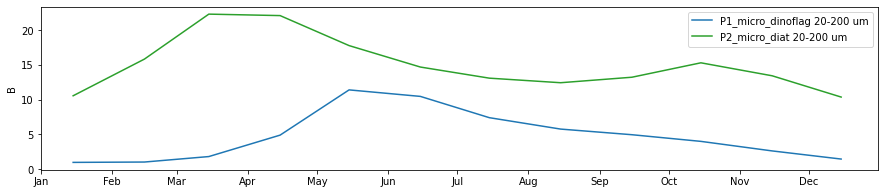

In [202]:
# averages for diatoms and dino (cols 4:6)
#ecospace_df[ewe_group].mean()
monthly_df = ecospace_df.groupby('month').mean()
pivmo_df = monthly_df.iloc[:,4:6].unstack().reset_index()

# Build figure layout
fig, ax = plt.subplots(figsize=(15, 3))

# Plotting properties
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3), cmap(0.4), cmap(0.6), cmap(0.8)]

# Plot Ecospace out
for ewe_group, color in zip(pivmo_df["level_0"].unique(), palette):
    rows1 = np.equal(pivmo_df["level_0"], ewe_group)
    #x = [m for m in pivmo_df['month'][rows1]]
    x = [datetime(2007, m, 15) for m in pivmo_df['month'][rows1]] # trick to get it to work
    #x = pivmo_df["month"][rows1]
    y = pivmo_df[0][rows1]
    ax.plot(x, y, color=color, label=ewe_group)
ax.set_xlim([datetime(2007, 1, 1), datetime(2007, 12, 31)]) # match year above
#ax.set_ylim([0, 12])
ax.set_ylabel('B')
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))
ax.legend()


look at early eighties versus 1990s

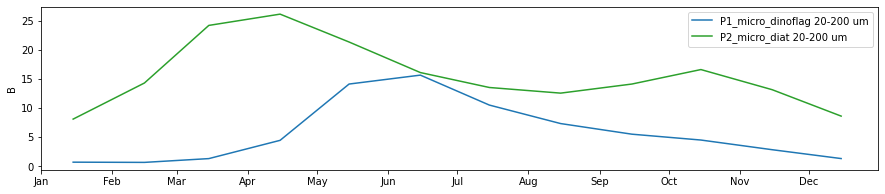

In [209]:
# regime 1(1979-1984) averages for diatoms and dino (cols 4:6)
#ecospace_df[ewe_group].mean()
ecospace_df_regime1 = ecospace_df[ecospace_df["year"] <= 1984]
monthly_df_regime1 = ecospace_df_regime1.groupby('month').mean()
pivmo_df = monthly_df_regime1.iloc[:,4:6].unstack().reset_index()

# Build figure layout
fig, ax = plt.subplots(figsize=(15, 3))

# Plotting properties
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3), cmap(0.4), cmap(0.6), cmap(0.8)]

# Plot Ecospace out
for ewe_group, color in zip(pivmo_df["level_0"].unique(), palette):
    rows1 = np.equal(pivmo_df["level_0"], ewe_group)
    #x = [m for m in pivmo_df['month'][rows1]]
    x = [datetime(2007, m, 15) for m in pivmo_df['month'][rows1]] # trick to get it to work
    #x = pivmo_df["month"][rows1]
    y = pivmo_df[0][rows1]
    ax.plot(x, y, color=color, label=ewe_group)
ax.set_xlim([datetime(2007, 1, 1), datetime(2007, 12, 31)]) # match year above
#ax.set_ylim([0, 12])
ax.set_ylabel('B')
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))
ax.legend()

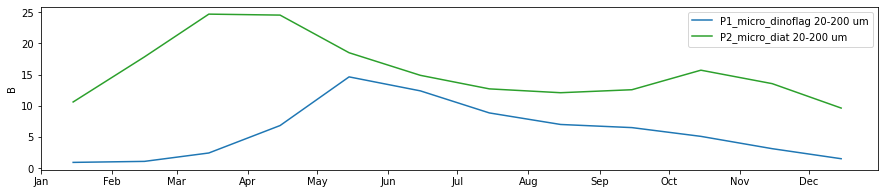

In [204]:
# regime 2(1990-1994) averages for diatoms and dino (cols 4:6)
#ecospace_df[ewe_group].mean()
ecospace_df_regime2 = ecospace_df[(ecospace_df["year"] >= 1990) & (ecospace_df["year"] <= 1994)]
monthly_df_regime2 = ecospace_df_regime2.groupby('month').mean()
pivmo_df = monthly_df_regime2.iloc[:,4:6].unstack().reset_index()

# Build figure layout
fig, ax = plt.subplots(figsize=(15, 3))

# Plotting properties
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3), cmap(0.4), cmap(0.6), cmap(0.8)]

# Plot Ecospace out
for ewe_group, color in zip(pivmo_df["level_0"].unique(), palette):
    rows1 = np.equal(pivmo_df["level_0"], ewe_group)
    x = [datetime(2007, m, 15) for m in pivmo_df['month'][rows1]] # trick to get it to work
    y = pivmo_df[0][rows1]
    ax.plot(x, y, color=color, label=ewe_group)
ax.set_xlim([datetime(2007, 1, 1), datetime(2007, 12, 31)]) # match year above
#ax.set_ylim([0, 12])
ax.set_ylabel('B')
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))
ax.legend()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


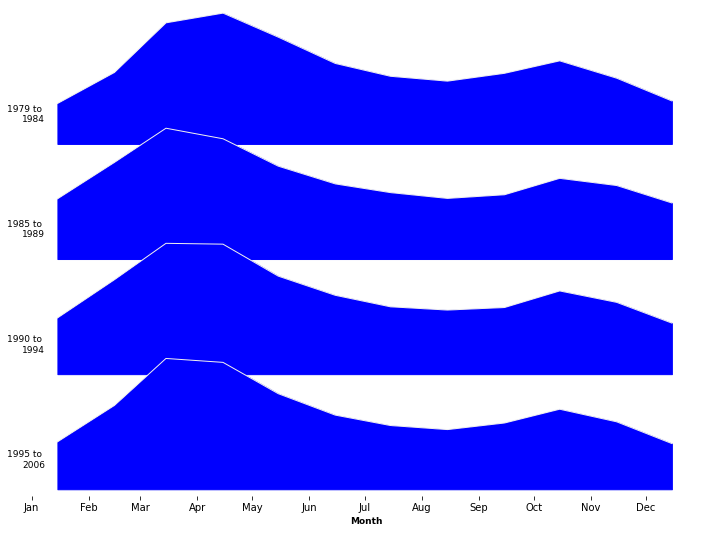

In [210]:
# ridgeline plots looking at change over time (each group)
#https://matplotlib.org/matplotblog/posts/create-ridgeplots-in-matplotlib/

regime_bounds = [[1979,1984],[1985,1989],[1990,1994],[1995,2006]]
#regime_bounds = [[1979,1981],[1982,1983],[1984,1985],
#                 [1986,1987],[1988,1989],[1990,1991],[1992,1993],
#                 [1994,1995],[1996,1997],[1998,1999],[2000,2001]]

# rows, cols
gs = (grid_spec.GridSpec(len(regime_bounds),1))

fig = plt.figure(figsize=(12,9))

i = 0

#creating empty list
ax_objs = []

#for each group we need different set of panels
#for eco_group in unique_groups:
#ewe_group = 'P1_micro_dinoflag 20-200 um'
ewe_group = 'P2_micro_diat 20-200 um'
colors = ['#0000ff', '#3300cc', '#660099', '#990066', '#cc0033', '#ff0000']
i = 0
for regime in regime_bounds:
    
    year_start = regime[0]
    year_end = regime[1]
    
    ax_objs.append(fig.add_subplot(gs[i:i+1, 0:]))
    
    # calc monthly mean values, all groups
    ecospace_df_regime2 = ecospace_df[(ecospace_df["year"] >= year_start) & (ecospace_df["year"] <= year_end)]
    monthly_df_regime2 = ecospace_df_regime2.groupby('month').mean()
    # pivot so long not wide
    pivmo_df = monthly_df_regime2.iloc[:,4:6].unstack().reset_index()
    pivmo_df["eco_group"] = pivmo_df["level_0"]
    pivmo_df["vals"] = pivmo_df[0]
    
    # get only data for this eco group
    rows1 = np.equal(data_df["eco_group"], ewe_group)
    
    # trick plots - year arbitrary
    x = [datetime(2007, m, 15) for m in pivmo_df['month'][rows1]] 
    y = pivmo_df[0][rows1]
    
    ax_objs[-1].plot(x,y,color="#f0f0f0",lw=1)
    ax_objs[-1].fill_between(x, y, alpha=1,color='#0000ff')
    #ax_objs[-1].fill_between(x, y, alpha=1,color=colors[i]) # to do fix colors
    
    ax_objs[-1].set_xlim([datetime(2007, 1, 1), datetime(2007, 12, 31)]) # match year above
    ax_objs[-1].xaxis.set_major_locator(dates.MonthLocator())
    ax_objs[-1].xaxis.set_major_formatter(dates.DateFormatter('%b'))
    
    name_regime = str(year_start) + " to \n" + str(year_end)
   
    ax.set_ylim([0, 12])
    
    # make background transparent
    rect = ax_objs[-1].patch
    rect.set_alpha(0)
    
    # remove borders, axis ticks, and labels
    ax_objs[-1].set_yticklabels([])
    ax_objs[-1].set_yticks([])
    
    if i == len(regime_bounds)-1:
        ax_objs[-1].set_xlabel("Month", fontsize=9,fontweight="bold")
    else:
        ax_objs[-1].set_xticklabels([])
        ax_objs[-1].set_xticks([])
    
    spines = ["top","right","left","bottom"]
    for s in spines:
        ax_objs[-1].spines[s].set_visible(False)

    # replaces set_ylabel
    ax_objs[-1].text(0.02,0.2,name_regime,fontsize=9,ha="right",transform=ax_objs[-1].transAxes)
    #ax_objs[-1].text(0,0,name_regime,fontweight="bold",fontsize=9,ha="right",transform=ax_objs[-1].transAxes)
    #ax_objs[-1].set_ylabel(name_regime,rotation=0)
    
    i += 1

gs.update(hspace=-0.2) #adjust spacing between ridgelines
    
plt.tight_layout()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:83: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


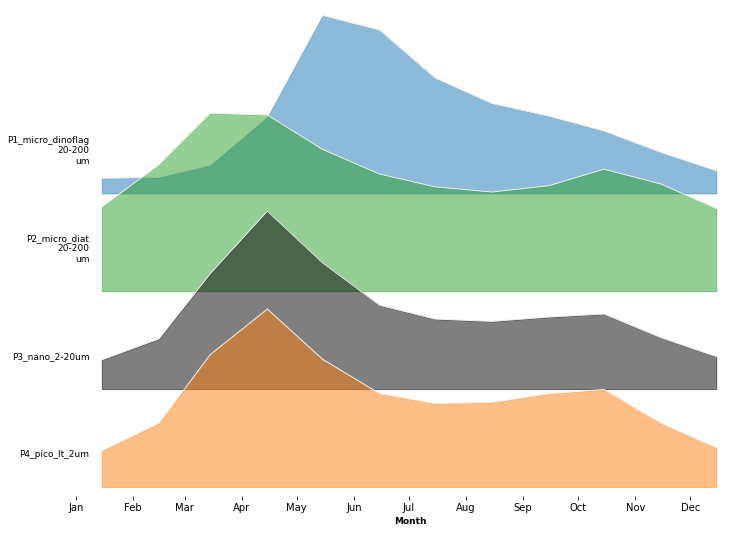

In [211]:
# ridgelines comparing ecological groups

ecospace_piv_df = ecospace_df.iloc[:,0:8].unstack().reset_index()

# do dates again
ecospace_piv_df["year"] = (ecospace_piv_df.TimeStep - 1) // 12 + 1979
ecospace_piv_df["month0"] = ecospace_piv_df.TimeStep % 12
ecospace_piv_df["month"] = ecospace_piv_df['month0'].apply(lambda x: 12if x == 0 else x)
ecospace_piv_df["day"] = 15 # assume Ecospace results are middle of month
ecospace_piv_df["date1"] = pd.to_datetime(ecospace_piv_df[["year", "month", "day"]])

ecospace_piv_df["eco_group"] = ecospace_piv_df["level_0"]
ecospace_piv_df["vals"] = ecospace_piv_df[0]

monthlyavg_df = ecospace_piv_df.groupby(['month','eco_group']).mean().reset_index()

unique_groups = monthlyavg_df["eco_group"].unique()
#unique_groups = unique_groups[0:2] #just diatoms and flag for now
unique_groups = unique_groups[0:4] #just phyto for now

# create palette with as different colors as possible
cmap = plt.get_cmap('tab10') # 10 colors max
# color count must match # unique groups
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1)]


# rows, cols
gs = (grid_spec.GridSpec(len(unique_groups),1))
fig = plt.figure(figsize=(12,9))
i = 0

#creating empty list
ax_objs = []

for eco_group in unique_groups:
    
    ax_objs.append(fig.add_subplot(gs[i:i+1, 0:]))
    
    # get only data for this eco group
    rows1 = np.equal(monthlyavg_df["eco_group"], eco_group)
    
    # trick plots - year arbitrary
    x = [datetime(2007, m, 15) for m in monthlyavg_df['month'][rows1]] 
    y = monthlyavg_df[0][rows1]
    
    ax_objs[-1].plot(x,y,color="#f0f0f0",lw=1)    
    ax_objs[-1].fill_between(x, y, alpha=0.5,color=palette[i]) # to do fix colors
    
    ax_objs[-1].set_xlim([datetime(2007, 1, 1), datetime(2007, 12, 31)]) # match year above
    ax_objs[-1].xaxis.set_major_locator(dates.MonthLocator())
    ax_objs[-1].xaxis.set_major_formatter(dates.DateFormatter('%b'))
   
    ax.set_ylim([0, 12])
    
    # make background transparent
    rect = ax_objs[-1].patch
    rect.set_alpha(0)
    
    # remove borders, axis ticks, and labels
    ax_objs[-1].set_yticklabels([])
    ax_objs[-1].set_yticks([])
    
    if i == len(regime_bounds)-1:
        ax_objs[-1].set_xlabel("Month", fontsize=9,fontweight="bold")
    else:
        ax_objs[-1].set_xticklabels([])
        ax_objs[-1].set_xticks([])
    
    spines = ["top","right","left","bottom"]
    for s in spines:
        ax_objs[-1].spines[s].set_visible(False)

    # replaces set_ylabel
    adj_eco_group = eco_group.replace(" ","\n")
    ax_objs[-1].text(0.02,0.2,adj_eco_group,fontsize=9,ha="right",transform=ax_objs[-1].transAxes)
    #ax_objs[-1].text(0,0,name_regime,fontweight="bold",fontsize=9,ha="right",transform=ax_objs[-1].transAxes)
    #ax_objs[-1].set_ylabel(name_regime,rotation=0)
    
    i += 1

gs.update(hspace=-0.5) #adjust spacing between ridgelines
    
plt.tight_layout()
plt.show()
    
    

In [183]:
unique_groups

array(['P1_micro_dinoflag 20-200 um', 'P2_micro_diat 20-200 um',
       'P3_nano_2-20um', 'P4_pico_lt_2um', 'Z1_2-20cm_macro',
       'Z2_0.2-20mm_meso', 'Z3_20-200um_micro', 'Z4_5-20um_nano'],
      dtype=object)

In [ ]:
# Read Ecospace out ASCII maps